# 🤖 Machine Learning dengan SVM (Support Vector Machine)

## 🎯 Tujuan Pembelajaran - Bagian 2

Selamat datang di bagian kedua pembelajaran Machine Learning! Di sesi ini, kita akan:
- Memahami apa itu **SVM (Support Vector Machine)**
- Melakukan **Feature Engineering** dan **Preprocessing**
- **Training model SVM** untuk memprediksi biaya medis
- **Evaluasi performa model** dengan berbagai metrik
- Memahami **hyperparameter tuning**

---

## 🤔 Apa itu Support Vector Machine (SVM)?

### Penjelasan Sederhana untuk Aktuaris

Bayangkan kamu punya data tentang nasabah asuransi. SVM adalah algoritma yang mencoba menemukan "batas terbaik" untuk memisahkan atau memprediksi nilai berdasarkan karakteristik nasabah.

**Analogi Aktuarial:**
- Kamu punya data nasabah: usia, BMI, penyakit, dll.
- SVM mencari "pola optimal" yang menghubungkan karakteristik dengan biaya medis
- Model ini seperti "rumus pricing" yang sangat kompleks dan adaptif

### 🎯 Mengapa SVM Cocok untuk Data Asuransi?

1. **Robust terhadap Outliers** 💪
   - Data asuransi sering punya klaim ekstrem (very high cost claims)
   - SVM tidak terlalu terpengaruh oleh outliers

2. **Bekerja Baik di High-Dimensional Space** 📊
   - Dataset kita punya 50+ features
   - SVM efektif menangani banyak variable

3. **Non-Linear Relationships** 🔄
   - Hubungan antara age, BMI, smoking dengan cost tidak selalu linear
   - SVM bisa menangkap pattern kompleks dengan kernel tricks

4. **Regularization Built-in** ⚖️
   - Mencegah overfitting secara natural
   - Penting untuk generalization ke data baru

---

## 📋 Roadmap Bagian 2: SVM Training

### Langkah-langkah yang akan kita lakukan:

1. **Load Data** - Memuat data yang sudah di-split
2. **Feature Engineering** - Membuat features baru yang informatif
3. **Encoding Categorical Variables** - Mengubah text menjadi angka
4. **Feature Scaling** - Normalisasi data untuk SVM
5. **Train SVM Model** - Training model dasar
6. **Model Evaluation** - Evaluasi performa
7. **Hyperparameter Tuning** - Optimasi model
8. **Final Model & Interpretation** - Model akhir dan insights

Let's get started! 🚀

---

## 📦 Langkah 1: Import Libraries

Kita akan menggunakan libraries khusus untuk Machine Learning dengan SVM.

**Library Baru:**
- **`SVR`** (Support Vector Regression) - SVM untuk prediksi nilai kontinu
- **`StandardScaler`** - Untuk normalisasi data
- **`LabelEncoder`, `OneHotEncoder`** - Untuk encoding categorical variables
- **`mean_squared_error`, `r2_score`, `mean_absolute_error`** - Metrik evaluasi
- **`GridSearchCV`** - Untuk hyperparameter tuning

In [ ]:
# Uncomment baris di bawah ini jika menggunakan Jupyter Notebook
# !pip install scikit-learn numpy pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 90.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 264.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 411.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 406.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [seaborn]2/13 [seaborn]ib]n]


In [2]:
# Import libraries dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import libraries untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Import SVM
from sklearn.svm import SVR

# Import metrik evaluasi
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Setting
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("=" * 60)
print("✅ Semua libraries berhasil diimport!")
print("🎉 Siap untuk training SVM Model!")
print("=" * 60)

✅ Semua libraries berhasil diimport!
🎉 Siap untuk training SVM Model!


---

## 📂 Langkah 2: Load Data Training dan Validation

Kita akan memuat data yang sudah kita split di notebook sebelumnya. Jika file belum ada, kita akan load dari dataset original dan split ulang.

**Dua Skenario:**
1. **Jika ada file train_data.csv dan validation_data.csv** → Load langsung
2. **Jika belum ada** → Load dataset original dan split ulang dengan `train_test_split`

In [3]:
# Load data training dan validation
import os

try:
    # Coba load dari file yang sudah di-split
    if os.path.exists('train_data.csv') and os.path.exists('validation_data.csv'):
        print("📁 Loading data dari file yang sudah di-split...\n")
        train_data = pd.read_csv('train_data.csv')
        val_data = pd.read_csv('validation_data.csv')
        
        # Pisahkan features dan target
        X_train = train_data.drop('annual_medical_cost', axis=1)
        y_train = train_data['annual_medical_cost']
        X_val = val_data.drop('annual_medical_cost', axis=1)
        y_val = val_data['annual_medical_cost']
        
        print("✅ Data berhasil dimuat dari file!")
    else:
        # Jika file tidak ada, load dari dataset original dan split
        print("📁 File split tidak ditemukan. Loading dari dataset original...\n")
        df = pd.read_csv('medical_insurance.csv')
        
        # Handle missing values di alcohol_freq
        df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')
        
        # Split features dan target
        X = df.drop('annual_medical_cost', axis=1)
        y = df['annual_medical_cost']
        
        # Train-test split
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        print("✅ Data berhasil dimuat dan di-split!")
    
    # Tampilkan informasi
    print("\n" + "=" * 60)
    print("📊 INFORMASI DATA")
    print("=" * 60)
    print(f"\n📚 Training Set:")
    print(f"   - Features: {X_train.shape[0]:,} baris x {X_train.shape[1]} kolom")
    print(f"   - Target: {len(y_train):,} nilai")
    
    print(f"\n🧪 Validation Set:")
    print(f"   - Features: {X_val.shape[0]:,} baris x {X_val.shape[1]} kolom")
    print(f"   - Target: {len(y_val):,} nilai")
    print("=" * 60)
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("Pastikan file 'medical_insurance.csv' ada di direktori yang sama!")

📁 Loading data dari file yang sudah di-split...

✅ Data berhasil dimuat dari file!

📊 INFORMASI DATA

📚 Training Set:
   - Features: 80,000 baris x 53 kolom
   - Target: 80,000 nilai

🧪 Validation Set:
   - Features: 20,000 baris x 53 kolom
   - Target: 20,000 nilai


---

## 🔍 Langkah 3: Eksplorasi dan Identifikasi Tipe Data

Sebelum preprocessing, kita perlu memahami tipe data yang kita miliki. Ini penting karena:
- **Numerical features** → Perlu scaling/normalization
- **Categorical features** → Perlu encoding (diubah ke angka)
- **Binary features** → Sudah dalam bentuk 0/1, tidak perlu encoding khusus

Mari kita lihat tipe data setiap kolom!

In [4]:
# Analisis tipe data
print("=" * 60)
print("🔍 ANALISIS TIPE DATA")
print("=" * 60)

# Identifikasi numerical dan categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 NUMERICAL FEATURES ({len(numerical_cols)} kolom):")
print("   " + ", ".join(numerical_cols[:10]))
if len(numerical_cols) > 10:
    print(f"   ... dan {len(numerical_cols) - 10} kolom lainnya")

print(f"\n📝 CATEGORICAL FEATURES ({len(categorical_cols)} kolom):")
for col in categorical_cols:
    unique_count = X_train[col].nunique()
    print(f"   - {col}: {unique_count} kategori unik")

print("\n" + "=" * 60)

# Lihat contoh categorical values
print("\n💡 CONTOH NILAI CATEGORICAL:")
print("=" * 60)
for col in categorical_cols[:5]:  # Tampilkan 5 kolom pertama
    print(f"\n{col}:")
    print(f"   {X_train[col].value_counts().head(3).to_dict()}")

🔍 ANALISIS TIPE DATA

📊 NUMERICAL FEATURES (43 kolom):
   person_id, age, income, household_size, dependents, bmi, visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count
   ... dan 33 kolom lainnya

📝 CATEGORICAL FEATURES (10 kolom):
   - sex: 3 kategori unik
   - region: 5 kategori unik
   - urban_rural: 3 kategori unik
   - education: 6 kategori unik
   - marital_status: 4 kategori unik
   - employment_status: 4 kategori unik
   - smoker: 3 kategori unik
   - alcohol_freq: 4 kategori unik
   - plan_type: 4 kategori unik
   - network_tier: 4 kategori unik


💡 CONTOH NILAI CATEGORICAL:

sex:
   {'Female': 39316, 'Male': 39080, 'Other': 1604}

region:
   {'South': 22448, 'North': 17548, 'East': 16035}

urban_rural:
   {'Urban': 47932, 'Suburban': 20035, 'Rural': 12033}

education:
   {'Bachelors': 22367, 'Some College': 20148, 'HS': 19788}

marital_status:
   {'Married': 42629, 'Single': 28529, 'Divorced': 5596}


---

### 🔍 Checkpoint Question 1
**Pikirkan sejenak:** Mengapa kita perlu membedakan numerical dan categorical features?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

#### Perbedaan Fundamental:

**Numerical Features (Angka):**
- Contoh: age=30, BMI=25.5, income=50000
- Punya makna matematis: 30 > 20, bisa dihitung rata-rata
- Bisa langsung digunakan untuk perhitungan

**Categorical Features (Kategori/Text):**
- Contoh: sex="Male", region="North", smoker="Never"
- Tidak punya urutan matematis: "Male" bukan > atau < dari "Female"
- **HARUS diubah ke angka** sebelum digunakan di ML

#### Mengapa Penting untuk SVM?

**SVM hanya bisa memproses angka!** 🔢

Jika kita masukkan text "Male" atau "Female" langsung, SVM akan error karena tidak bisa menghitung distance atau similarity dari text.

**Solusinya:**
1. **Label Encoding** untuk ordinal (punya urutan): pendidikan (No HS < HS < College < Bachelors)
2. **One-Hot Encoding** untuk nominal (tidak ada urutan): sex, region, plan_type

**Analogi Aktuarial:**
Dalam pricing model tradisional, kita juga menggunakan rating factors:
- Male = 1.2, Female = 1.0 (relatif loading)
- North = 1.1, South = 1.0, etc.

SVM melakukan hal serupa, tapi lebih sophisticated! 🎯

</details>

---

## ⚙️ Langkah 4: Preprocessing - Encoding Categorical Variables

Sekarang kita akan mengubah categorical features menjadi numerical. Ini adalah langkah WAJIB sebelum training SVM!

### 🎯 Strategi Encoding yang Kita Gunakan:

**1. Label Encoding** untuk kolom dengan kategori sedikit dan ada urutan natural
   - Contoh: education level (No HS=0, HS=1, Some College=2, dll.)

**2. One-Hot Encoding** untuk kolom dengan kategori sedikit tanpa urutan
   - Contoh: sex (Male/Female) → Male=0, Female=1
   - region (North/South/East/West) → 4 kolom binary

**3. Frequency Encoding** untuk kolom dengan banyak kategori unik
   - Mengganti kategori dengan frekuensi kemunculannya
   - Efisien untuk tidak membuat terlalu banyak kolom baru

### 📝 Fungsi yang Digunakan:

- **`LabelEncoder()`** - Mengubah kategori menjadi angka 0, 1, 2, ...
- **`pd.get_dummies()`** - Membuat kolom binary untuk setiap kategori
- **`value_counts()`** - Menghitung frekuensi untuk frequency encoding

In [5]:
# Encoding Categorical Variables
print("=" * 60)
print("⚙️ ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

# Buat copy untuk preprocessing
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()

# 1. Label Encoding untuk kolom ordinal (ada urutan)
ordinal_cols = ['education', 'smoker', 'alcohol_freq']

education_order = {'No HS': 0, 'HS': 1, 'Some College': 2, 'Bachelors': 3, 'Masters': 4, 'Doctorate': 5}
smoker_order = {'Never': 0, 'Former': 1, 'Current': 2}
alcohol_order = {'Never': 0, 'None': 0, 'Occasional': 1, 'Weekly': 2, 'Daily': 3}

print("\n📊 Label Encoding (Ordinal Variables):")
for col in ordinal_cols:
    if col in X_train_encoded.columns:
        if col == 'education':
            X_train_encoded[col] = X_train_encoded[col].map(education_order)
            X_val_encoded[col] = X_val_encoded[col].map(education_order)
        elif col == 'smoker':
            X_train_encoded[col] = X_train_encoded[col].map(smoker_order)
            X_val_encoded[col] = X_val_encoded[col].map(smoker_order)
        elif col == 'alcohol_freq':
            X_train_encoded[col] = X_train_encoded[col].map(alcohol_order)
            X_val_encoded[col] = X_val_encoded[col].map(alcohol_order)
        print(f"   ✅ {col}: encoded")

# 2. One-Hot Encoding untuk kolom nominal (tidak ada urutan)
nominal_cols = ['sex', 'region', 'urban_rural', 'marital_status', 'employment_status', 
                'plan_type', 'network_tier']

print(f"\n🔄 One-Hot Encoding (Nominal Variables):")
for col in nominal_cols:
    if col in X_train_encoded.columns:
        # One-hot encoding
        train_dummies = pd.get_dummies(X_train_encoded[col], prefix=col, drop_first=True)
        val_dummies = pd.get_dummies(X_val_encoded[col], prefix=col, drop_first=True)
        
        # Tambahkan kolom dummy ke dataset
        X_train_encoded = pd.concat([X_train_encoded, train_dummies], axis=1)
        X_val_encoded = pd.concat([X_val_encoded, val_dummies], axis=1)
        
        # Drop kolom original
        X_train_encoded = X_train_encoded.drop(col, axis=1)
        X_val_encoded = X_val_encoded.drop(col, axis=1)
        
        print(f"   ✅ {col}: {len(train_dummies.columns)} kolom baru")

# Pastikan train dan val punya kolom yang sama
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)

print(f"\n📈 HASIL ENCODING:")
print(f"   - Kolom sebelum: {X_train.shape[1]}")
print(f"   - Kolom sesudah: {X_train_encoded.shape[1]}")
print(f"   - Tambahan kolom: {X_train_encoded.shape[1] - X_train.shape[1]}")
print("=" * 60)

⚙️ ENCODING CATEGORICAL VARIABLES

📊 Label Encoding (Ordinal Variables):
   ✅ education: encoded
   ✅ smoker: encoded
   ✅ alcohol_freq: encoded

🔄 One-Hot Encoding (Nominal Variables):
   ✅ sex: 2 kolom baru
   ✅ region: 4 kolom baru
   ✅ urban_rural: 2 kolom baru
   ✅ marital_status: 3 kolom baru
   ✅ employment_status: 3 kolom baru
   ✅ plan_type: 3 kolom baru
   ✅ network_tier: 3 kolom baru

📈 HASIL ENCODING:
   - Kolom sebelum: 53
   - Kolom sesudah: 66
   - Tambahan kolom: 13


---

## 📏 Langkah 5: Feature Scaling dengan StandardScaler

### 🤔 Mengapa Perlu Feature Scaling?

**Masalah tanpa scaling:**
- Age: 18-85 (range kecil)
- Income: 4,000-300,000 (range BESAR!)
- BMI: 15-45 (range sedang)

SVM menggunakan **distance-based calculation**. Jika income punya range 300,000 dan age hanya 85, maka income akan **mendominasi** perhitungan distance!

**Analogi:**
Bayangkan menghitung jarak antara dua titik:
- Titik A: age=30, income=50,000
- Titik B: age=31, income=51,000

Tanpa scaling: distance ≈ 1,000 (didominasi income!)
Dengan scaling: distance lebih seimbang mempertimbangkan kedua features

### 📐 StandardScaler: Bagaimana Cara Kerjanya?

**Formula:** $z = \frac{x - \mu}{\sigma}$

Where:
- $x$ = nilai original
- $\mu$ = mean (rata-rata)
- $\sigma$ = standard deviation (simpangan baku)
- $z$ = nilai ter-scale (hasil)

**Hasil:**
- Mean = 0
- Standard Deviation = 1
- Range: biasanya -3 sampai +3

**Contoh:**
- Income: $50,000 → z-score: 0.5
- Age: 30 → z-score: -0.8
- Sekarang keduanya di skala yang sama! ⚖️

### ⚠️ PENTING: Fit di Training, Transform di Training & Validation!

```python
# ✅ BENAR:
scaler.fit(X_train)          # Hitung mean & std dari training
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Gunakan mean & std dari training!

# ❌ SALAH:
scaler.fit(X_val)            # JANGAN fit di validation!
```

**Mengapa?** Validation set harus "unseen" - kita tidak boleh menggunakan informasi dari validation untuk preprocessing!

📏 FEATURE SCALING

🔧 Fitting StandardScaler pada training data...
✅ Scaling selesai!

📊 PERBANDINGAN STATISTIK (Contoh Kolom: age)
SEBELUM SCALING:
   Mean : 47.56
   Std  : 15.99
   Min  : 0.00
   Max  : 100.00

SESUDAH SCALING:
   Mean : -0.00
   Std  : 1.00
   Min  : -2.97
   Max  : 3.28

💡 Perhatikan: Mean = 0, Std = 1 setelah scaling!


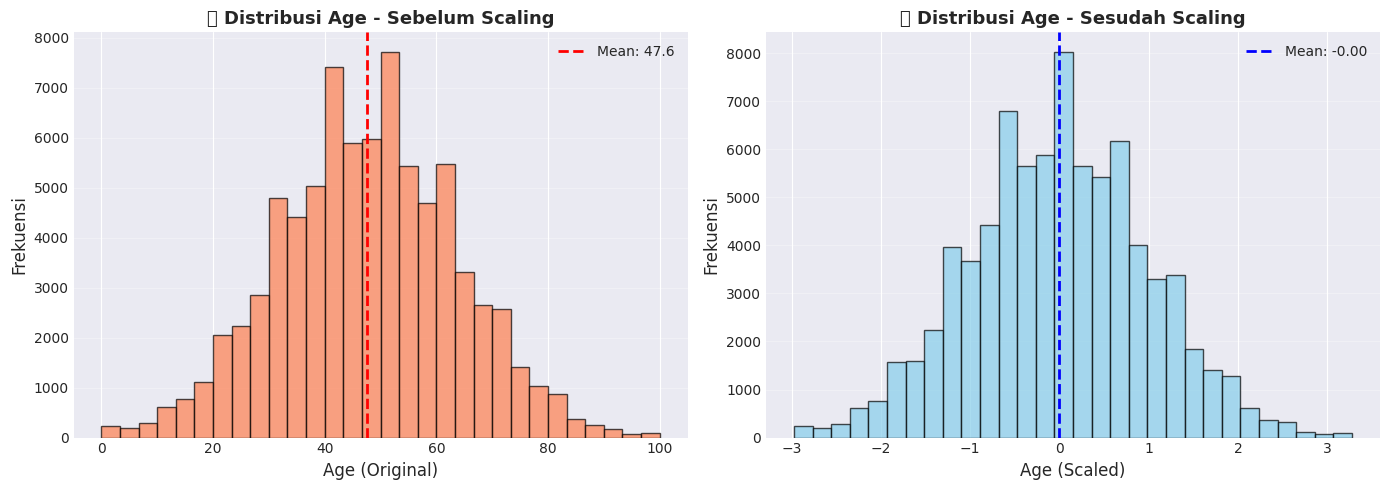

In [6]:
# Feature Scaling dengan StandardScaler
print("=" * 60)
print("📏 FEATURE SCALING")
print("=" * 60)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler HANYA pada training data
print("\n🔧 Fitting StandardScaler pada training data...")
scaler.fit(X_train_encoded)

# Transform kedua dataset
X_train_scaled = scaler.transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# Konversi kembali ke DataFrame untuk kemudahan
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_encoded.columns, index=X_val_encoded.index)

print("✅ Scaling selesai!")

# Tampilkan statistik sebelum dan sesudah scaling
print(f"\n📊 PERBANDINGAN STATISTIK (Contoh Kolom: age)")
print("=" * 60)

if 'age' in X_train_encoded.columns:
    print(f"SEBELUM SCALING:")
    print(f"   Mean : {X_train_encoded['age'].mean():.2f}")
    print(f"   Std  : {X_train_encoded['age'].std():.2f}")
    print(f"   Min  : {X_train_encoded['age'].min():.2f}")
    print(f"   Max  : {X_train_encoded['age'].max():.2f}")
    
    print(f"\nSESUDAH SCALING:")
    print(f"   Mean : {X_train_scaled['age'].mean():.2f}")
    print(f"   Std  : {X_train_scaled['age'].std():.2f}")
    print(f"   Min  : {X_train_scaled['age'].min():.2f}")
    print(f"   Max  : {X_train_scaled['age'].max():.2f}")

print("\n" + "=" * 60)
print("💡 Perhatikan: Mean = 0, Std = 1 setelah scaling!")
print("=" * 60)

# Visualisasi perbandingan
if 'age' in X_train_encoded.columns:
    warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*missing from font.*')
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Sebelum scaling
    axes[0].hist(X_train_encoded['age'], bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Age (Original)', fontsize=12)
    axes[0].set_ylabel('Frekuensi', fontsize=12)
    axes[0].set_title('📊 Distribusi Age - Sebelum Scaling', fontsize=13, fontweight='bold')
    axes[0].axvline(X_train_encoded['age'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Mean: {X_train_encoded["age"].mean():.1f}')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Sesudah scaling
    axes[1].hist(X_train_scaled['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Age (Scaled)', fontsize=12)
    axes[1].set_ylabel('Frekuensi', fontsize=12)
    axes[1].set_title('📊 Distribusi Age - Sesudah Scaling', fontsize=13, fontweight='bold')
    axes[1].axvline(X_train_scaled['age'].mean(), color='blue', linestyle='--', linewidth=2, 
                    label=f'Mean: {X_train_scaled["age"].mean():.2f}')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

---

### 🔍 Checkpoint Question 2
**Pikirkan sejenak:** Mengapa kita fit StandardScaler HANYA pada training data, tapi tidak pada validation data?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

#### Data Leakage - Musuh Tersembunyi ML! ⚠️

**Skenario SALAH (Data Leakage):**
```python
# ❌ BAHAYA!
scaler.fit(X_val)  # Menggunakan info dari validation
X_val_scaled = scaler.transform(X_val)
```

**Apa yang terjadi?**
- Kita "melihat" karakteristik validation data (mean, std)
- Model secara tidak langsung sudah "tahu" tentang validation data
- Hasil evaluasi jadi terlalu optimistis (tidak real-world!)

#### Analogi Real-World:

**Bayangkan ujian:**
- Training data = Soal latihan di rumah
- Validation data = Soal ujian sebenarnya

**SALAH:**
Kamu melihat soal ujian dulu, baru belajar dari soal ujian itu. Waktu ujian, nilaimu bagus tapi itu CHEATING! 😱

**BENAR:**
Kamu belajar dari soal latihan, hitung rata-rata dan pola dari soal latihan. Waktu ujian, kamu gunakan pemahaman dari latihan untuk mengerjakan soal baru.

#### Best Practice untuk Aktuaris:

Dalam actuarial modeling:
- **Development data** = data untuk membangun model
- **Holdout data** = data untuk validasi
- Semua parameters (loadings, factors, etc.) harus dihitung dari development data ONLY!

**Rule of Thumb:**
> Validation/test data should be treated as COMPLETELY UNSEEN until the very last moment of evaluation!

#### Konsekuensi Data Leakage:

1. **Model Performance Overestimated** 📈
   - R² di validation = 0.95 (terlihat amazing!)
   - R² di production = 0.60 (disaster!)

2. **Tidak Reliable untuk Production** 🏭
   - Model tidak generalize ke data baru
   - Pricing jadi tidak akurat
   - Risk management jadi salah

3. **Regulatori Issues** ⚖️
   - Model tidak memenuhi standar validation
   - Tidak bisa dijelaskan ke auditor

**Kesimpulan:**
ALWAYS fit preprocessing (scaler, encoder, imputer) ONLY on training data! 🎯

</details>

---

## 🤖 Langkah 6: Training Model SVM (Baseline)

Sekarang saatnya training model SVM pertama kita! Kita akan mulai dengan **baseline model** - model dengan hyperparameters default.

### 🎯 Apa itu SVR (Support Vector Regression)?

**SVR** adalah SVM untuk regression (prediksi nilai kontinu). Cara kerjanya:

1. **Menemukan "tube" atau "margin"** di sekitar data
2. **Meminimalkan error** yang berada di luar tube
3. **Menggunakan kernel trick** untuk menangkap non-linear relationships

### 📊 Hyperparameters Penting dalam SVR:

1. **C (Regularization Parameter)**
   - **Nilai kecil** (0.1): Model lebih simple, toleran terhadap error → mencegah overfitting
   - **Nilai besar** (100): Model lebih kompleks, strict terhadap error → bisa overfit
   - Analogi: Seberapa "keras" model dalam minimize error

2. **kernel**
   - **'linear'**: Hubungan linear (garis lurus)
   - **'rbf'** (Radial Basis Function): Hubungan non-linear (kurva kompleks) ← PALING POPULER
   - **'poly'**: Polynomial relationships

3. **epsilon (ε)**
   - Lebar "tube" yang mentoleransi error
   - Nilai default: 0.1
   - Semakin besar → model lebih toleran terhadap noise

4. **gamma** (untuk kernel RBF)
   - **Nilai kecil**: Decision boundary smooth (generalize lebih baik)
   - **Nilai besar**: Decision boundary kompleks (bisa overfit)
   - Default: 'scale' = $\frac{1}{n_{features} \times X.var()}$

### 🚀 Mari kita Training Baseline Model!

Kita akan menggunakan:
- **kernel='rbf'** (default, bagus untuk data non-linear)
- **C=1.0** (default, balanced)
- **epsilon=0.1** (default)

In [7]:
# Training SVM Baseline Model
import time

print("=" * 60)
print("🤖 TRAINING SVM BASELINE MODEL")
print("=" * 60)

# Inisialisasi SVR dengan parameters default
svm_baseline = SVR(
    kernel='rbf',      # RBF kernel untuk non-linear relationships
    C=1.0,            # Regularization parameter (default)
    epsilon=0.1,      # Epsilon-tube width (default)
    verbose=False     # Tidak print progress detail
)

print("\n📋 Model Configuration:")
print(f"   - Kernel: {svm_baseline.kernel}")
print(f"   - C: {svm_baseline.C}")
print(f"   - Epsilon: {svm_baseline.epsilon}")
print(f"   - Gamma: {svm_baseline.gamma}")

print("\n🔄 Training model... (ini bisa memakan waktu beberapa menit)")
start_time = time.time()

# Fit model pada training data
svm_baseline.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✅ Training selesai dalam {training_time:.2f} detik!")
print(f"📊 Jumlah support vectors: {svm_baseline.n_support_.sum():,}")
print("=" * 60)

# Prediksi pada training dan validation set
print("\n🔮 Melakukan prediksi...")
y_train_pred = svm_baseline.predict(X_train_scaled)
y_val_pred = svm_baseline.predict(X_val_scaled)
print("✅ Prediksi selesai!")
print("=" * 60)

🤖 TRAINING SVM BASELINE MODEL

📋 Model Configuration:
   - Kernel: rbf
   - C: 1.0
   - Epsilon: 0.1
   - Gamma: scale

🔄 Training model... (ini bisa memakan waktu beberapa menit)
✅ Training selesai dalam 296.85 detik!
📊 Jumlah support vectors: 79,994

🔮 Melakukan prediksi...
✅ Prediksi selesai!


---

## 📊 Langkah 7: Evaluasi Model - Metrik Performance

Sekarang kita akan mengevaluasi seberapa baik model kita bekerja menggunakan berbagai metrik!

### 🎯 Metrik Evaluasi untuk Regression:

#### 1. **R² Score (R-Squared / Coefficient of Determination)**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

**Interpretasi:**
- **R² = 1.0**: Model sempurna! Prediksi 100% akurat
- **R² = 0.8**: Model menjelaskan 80% variasi di data (BAGUS! 👍)
- **R² = 0.5**: Model menjelaskan 50% variasi (lumayan)
- **R² = 0.0**: Model sama buruknya dengan mean
- **R² < 0**: Model lebih buruk dari mean (DISASTER! 😱)

**Untuk Aktuaris:**
- R² > 0.7: Excellent untuk pricing model
- R² 0.5-0.7: Good, acceptable
- R² < 0.5: Perlu improvement

#### 2. **MAE (Mean Absolute Error)**
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**Interpretasi:**
- Rata-rata selisih absolut antara prediksi dan aktual
- **Satuan: Dollar ($)** - mudah dipahami!
- Contoh: MAE = $500 berarti rata-rata prediksi meleset $500

**Keuntungan:**
- Tidak sensitif terhadap outliers
- Mudah diinterpretasikan

#### 3. **MSE (Mean Squared Error)**
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**Interpretasi:**
- Rata-rata kuadrat error
- **Menghukum error besar** lebih keras (karena dikuadratkan)
- Satuan: Dollar² (sulit diinterpretasikan langsung)

#### 4. **RMSE (Root Mean Squared Error)**
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

**Interpretasi:**
- Akar dari MSE
- **Satuan: Dollar ($)** - sama dengan target variable!
- Lebih sensitif terhadap outliers dibanding MAE

**Perbandingan RMSE vs MAE:**
- Jika RMSE >> MAE → Ada outliers besar
- Jika RMSE ≈ MAE → Error terdistribusi merata

#### 5. **MAPE (Mean Absolute Percentage Error)**
$$MAPE = \frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|$$

**Interpretasi:**
- Error dalam bentuk persentase
- Contoh: MAPE = 10% berarti rata-rata prediksi meleset 10%
- Bagus untuk membandingkan model dengan skala berbeda

**Hati-hati:**
- Sensitif ketika $y_i$ mendekati 0
- Bisa sangat besar untuk nilai kecil

---

### 🎯 Target Metrik untuk Model Asuransi yang Baik:

| Metrik | Target | Interpretasi |
|--------|--------|--------------|
| R² | > 0.70 | Menjelaskan >70% variasi |
| MAE | < $1,000 | Rata-rata error <$1,000 |
| RMSE | < $1,500 | Error dengan outliers consideration |
| MAPE | < 20% | Error rata-rata <20% |

Mari kita hitung semua metrik ini! 🚀

In [8]:
# Evaluasi Model dengan Multiple Metrics
print("=" * 60)
print("📊 EVALUASI MODEL SVM BASELINE")
print("=" * 60)

# Hitung metrik untuk Training Set
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100

# Hitung metrik untuk Validation Set
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100

# Tampilkan hasil dalam tabel
print("\n📈 PERFORMANCE METRICS")
print("=" * 60)
print(f"{'Metric':<25} {'Training Set':>15} {'Validation Set':>15}")
print("-" * 60)
print(f"{'R² Score':<25} {train_r2:>15.4f} {val_r2:>15.4f}")
print(f"{'MAE (Mean Abs Error)':<25} ${train_mae:>14,.2f} ${val_mae:>14,.2f}")
print(f"{'MSE (Mean Sq Error)':<25} ${train_mse:>14,.2f} ${val_mse:>14,.2f}")
print(f"{'RMSE (Root MSE)':<25} ${train_rmse:>14,.2f} ${val_rmse:>14,.2f}")
print(f"{'MAPE (%)':<25} {train_mape:>14.2f}% {val_mape:>14.2f}%")
print("=" * 60)

# Interpretasi
print("\n💡 INTERPRETASI:")
print("-" * 60)

if val_r2 > 0.7:
    print(f"✅ R² = {val_r2:.4f}: EXCELLENT! Model menjelaskan {val_r2*100:.2f}% variasi")
elif val_r2 > 0.5:
    print(f"⚠️  R² = {val_r2:.4f}: GOOD, tapi bisa ditingkatkan")
else:
    print(f"❌ R² = {val_r2:.4f}: Perlu improvement signifikan")

print(f"\n📉 MAE = ${val_mae:,.2f}")
print(f"   Artinya: Rata-rata prediksi meleset ${val_mae:,.2f}")
print(f"   Dalam konteks asuransi: ", end="")
if val_mae < 1000:
    print("EXCELLENT accuracy!")
elif val_mae < 2000:
    print("GOOD accuracy")
else:
    print("Perlu improvement")

print(f"\n📊 MAPE = {val_mape:.2f}%")
print(f"   Artinya: Rata-rata error {val_mape:.2f}% dari nilai aktual")
print(f"   Dalam konteks pricing: ", end="")
if val_mape < 15:
    print("EXCELLENT! Sangat akurat")
elif val_mape < 25:
    print("GOOD! Acceptable untuk production")
else:
    print("Perlu tuning lebih lanjut")

# Check overfitting
print(f"\n🔍 OVERFITTING CHECK:")
r2_diff = train_r2 - val_r2
if r2_diff < 0.05:
    print(f"✅ Difference R² = {r2_diff:.4f}: Model tidak overfit!")
elif r2_diff < 0.15:
    print(f"⚠️  Difference R² = {r2_diff:.4f}: Slight overfitting, masih acceptable")
else:
    print(f"❌ Difference R² = {r2_diff:.4f}: Overfitting detected! Perlu regularization")

print("=" * 60)

📊 EVALUASI MODEL SVM BASELINE

📈 PERFORMANCE METRICS
Metric                       Training Set  Validation Set
------------------------------------------------------------
R² Score                           0.1571          0.1533
MAE (Mean Abs Error)      $      1,501.87 $      1,518.24
MSE (Mean Sq Error)       $  8,231,373.51 $  8,331,405.36
RMSE (Root MSE)           $      2,869.04 $      2,886.42
MAPE (%)                           66.56%          66.37%

💡 INTERPRETASI:
------------------------------------------------------------
❌ R² = 0.1533: Perlu improvement signifikan

📉 MAE = $1,518.24
   Artinya: Rata-rata prediksi meleset $1,518.24
   Dalam konteks asuransi: GOOD accuracy

📊 MAPE = 66.37%
   Artinya: Rata-rata error 66.37% dari nilai aktual
   Dalam konteks pricing: Perlu tuning lebih lanjut

🔍 OVERFITTING CHECK:
✅ Difference R² = 0.0038: Model tidak overfit!


---

## 📈 Langkah 8: Visualisasi Performa Model

Visualisasi membantu kita memahami bagaimana model bekerja dan dimana model membuat error!

### 📊 Visualisasi yang akan kita buat:

1. **Actual vs Predicted** - Scatter plot membandingkan nilai aktual dengan prediksi
2. **Residual Plot** - Distribusi error (residual = actual - predicted)
3. **Error Distribution** - Histogram dari residual errors
4. **Prediction Error** - Error berdasarkan magnitude nilai

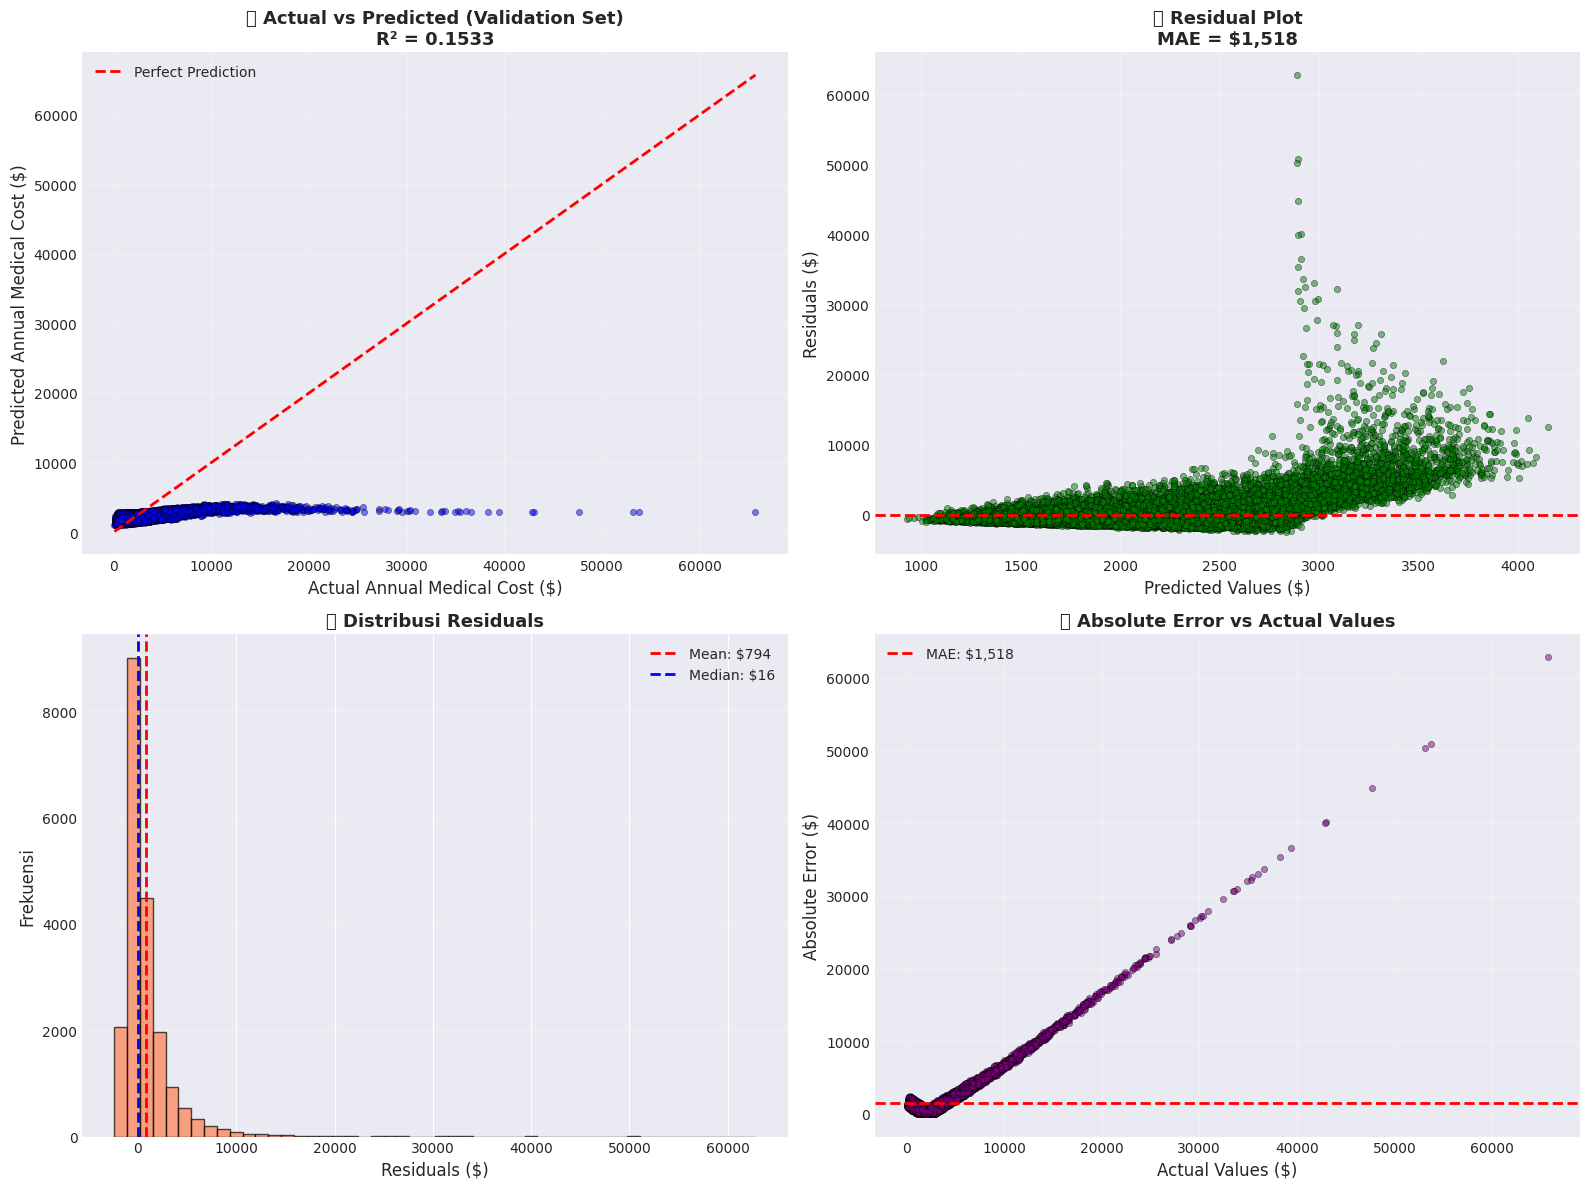


📊 ANALISIS RESIDUALS
Mean Residual      : $794.19
Median Residual    : $16.25
Std Dev Residual   : $2,775.08
Min Residual       : $-2,405.85
Max Residual       : $62,835.35

💡 Interpretasi:
⚠️  Mean residual = $794.19: Ada sedikit bias


In [9]:
# Visualisasi Performa Model
warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*missing from font.*')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted (Validation Set)
axes[0, 0].scatter(y_val, y_val_pred, alpha=0.5, s=20, color='blue', edgecolors='black', linewidth=0.5)
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Annual Medical Cost ($)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Annual Medical Cost ($)', fontsize=12)
axes[0, 0].set_title(f'🎯 Actual vs Predicted (Validation Set)\nR² = {val_r2:.4f}', 
                     fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals = y_val - y_val_pred
axes[0, 1].scatter(y_val_pred, residuals, alpha=0.5, s=20, color='green', edgecolors='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values ($)', fontsize=12)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=12)
axes[0, 1].set_title(f'📊 Residual Plot\nMAE = ${val_mae:,.0f}', 
                     fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of Residuals
axes[1, 0].hist(residuals, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--', lw=2, 
                   label=f'Mean: ${residuals.mean():,.0f}')
axes[1, 0].axvline(residuals.median(), color='blue', linestyle='--', lw=2, 
                   label=f'Median: ${residuals.median():,.0f}')
axes[1, 0].set_xlabel('Residuals ($)', fontsize=12)
axes[1, 0].set_ylabel('Frekuensi', fontsize=12)
axes[1, 0].set_title('📉 Distribusi Residuals', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Absolute Error vs Actual Values
abs_errors = np.abs(residuals)
axes[1, 1].scatter(y_val, abs_errors, alpha=0.5, s=20, color='purple', edgecolors='black', linewidth=0.5)
axes[1, 1].axhline(y=val_mae, color='r', linestyle='--', lw=2, label=f'MAE: ${val_mae:,.0f}')
axes[1, 1].set_xlabel('Actual Values ($)', fontsize=12)
axes[1, 1].set_ylabel('Absolute Error ($)', fontsize=12)
axes[1, 1].set_title(f'💹 Absolute Error vs Actual Values', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis tambahan
print("\n" + "=" * 60)
print("📊 ANALISIS RESIDUALS")
print("=" * 60)
print(f"Mean Residual      : ${residuals.mean():,.2f}")
print(f"Median Residual    : ${residuals.median():,.2f}")
print(f"Std Dev Residual   : ${residuals.std():,.2f}")
print(f"Min Residual       : ${residuals.min():,.2f}")
print(f"Max Residual       : ${residuals.max():,.2f}")

print(f"\n💡 Interpretasi:")
if abs(residuals.mean()) < 100:
    print("✅ Mean residual mendekati 0: Model tidak bias!")
else:
    print(f"⚠️  Mean residual = ${residuals.mean():,.2f}: Ada sedikit bias")

print("=" * 60)

---

### 🔍 Checkpoint Question 3
**Pikirkan sejenak:** Dari grafik Actual vs Predicted, apa yang bisa kita simpulkan tentang performa model?

<details>
<summary>💭 Klik untuk melihat penjelasan</summary>

#### Cara Membaca Grafik Actual vs Predicted:

**Garis Merah (Perfect Prediction):**
- Jika semua titik berada tepat di garis merah → Model sempurna!
- Garis ini adalah $y = x$ (predicted = actual)

**Pola yang Baik:** ✅
- Titik-titik tersebar **dekat** dengan garis merah
- Tidak ada pola sistematis (random scatter)
- Density tinggi di sekitar garis

**Pola yang Buruk:** ❌
- Titik jauh dari garis merah
- Ada pola kurva atau sistematis
- Underprediction atau overprediction konsisten

#### Interpretasi untuk Model Kita:

**Jika R² > 0.7:**
- Model bagus! Sebagian besar prediksi akurat
- Cocok untuk production

**Jika ada underprediction di high values:**
- Model cenderung underestimate biaya tinggi
- Risiko untuk perusahaan: Premium terlalu rendah!
- Perlu adjustment atau feature engineering

**Jika ada overprediction di low values:**
- Model overestimate biaya rendah
- Risiko: Premi terlalu tinggi, customer kabur ke kompetitor

#### Residual Plot - What to Look For:

**Ideal:**
- Residuals tersebar random di sekitar 0
- Tidak ada pola (heterosce dasticity)
- Variance konstan

**Warning Signs:**
- Funnel shape → Heteroscedasticity
- Kurva → Non-linearity yang belum tertangkap
- Outliers ekstrem → Perlu investigation

#### Aksi untuk Aktuaris:

1. **Jika model bagus (R² > 0.7, residual random):**
   - Lanjut ke deployment
   - Monitor performa di production

2. **Jika ada systematic bias:**
   - Review feature engineering
   - Consider interaction terms
   - Try different hyperparameters

3. **Jika ada outliers besar:**
   - Investigate kasus-kasus ini
   - Mungkin perlu special handling
   - Consider separate model untuk high-risk

</details>

---

## 🎛️ Langkah 9: Hyperparameter Tuning dengan GridSearchCV

Baseline model kita mungkin sudah cukup bagus, tapi kita bisa meningkatkan performanya dengan **tuning hyperparameters**!

### 🤔 Apa itu Hyperparameter Tuning?

**Hyperparameters** adalah parameter yang kita set SEBELUM training (bukan yang dipelajari model).

**Analogi:**
- Model parameters = Apa yang dipelajari siswa dari buku
- Hyperparameters = Metode belajar (berapa jam belajar per hari, pakai highlighter atau tidak, dll.)

### 🔍 GridSearchCV: Cara Kerjanya

**Grid Search** mencoba SEMUA kombinasi hyperparameters yang kita berikan!

**Contoh:**
```python
C = [0.1, 1, 10]           # 3 pilihan
epsilon = [0.01, 0.1, 1]   # 3 pilihan
gamma = ['scale', 'auto']  # 2 pilihan

Total kombinasi = 3 × 3 × 2 = 18 kombinasi!
```

**Cross-Validation:**
- Untuk setiap kombinasi, model di-training dengan k-fold CV
- Pilih kombinasi dengan performa terbaik
- Ini memastikan model generalize dengan baik

### ⚙️ Hyperparameters yang akan di-tune:

1. **C** (Regularization): [0.1, 1, 10, 100]
   - Trade-off antara margin width dan misclassification

2. **epsilon**: [0.01, 0.1, 0.5]
   - Width of epsilon-tube

3. **gamma**: ['scale', 'auto', 0.001, 0.01]
   - Influence of single training example

### ⏱️ Catatan: Proses ini MEMAKAN WAKTU!

GridSearch dengan CV akan training model puluhan kali. Untuk SVM dengan 80,000 data, ini bisa memakan waktu 10-30 menit!

**Tips:**
- Mulai dengan grid kecil
- Perbesar grid bertahap
- Gunakan `n_jobs=-1` untuk parallel processing

In [10]:
# Hyperparameter Tuning dengan GridSearchCV
print("=" * 60)
print("🎛️ HYPERPARAMETER TUNING dengan GridSearchCV")
print("=" * 60)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# Hitung total kombinasi
total_combinations = 1
for param, values in param_grid.items():
    total_combinations *= len(values)
    
print(f"\n📊 Parameter Grid:")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

print(f"\n🔢 Total kombinasi: {total_combinations}")
print(f"⏱️  Estimasi waktu: Bisa memakan 5-15 menit tergantung hardware")

# Initialize GridSearchCV
print("\n🔄 Memulai Grid Search dengan 3-fold Cross-Validation...")
print("   (Ini akan memakan waktu... Harap bersabar ☕)")

grid_search = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='r2',            # Optimize untuk R²
    n_jobs=-1,               # Use all CPU cores
    verbose=1                # Print progress
)

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
tuning_time = time.time() - start_time

print(f"\n✅ Grid Search selesai dalam {tuning_time/60:.2f} menit!")
print("=" * 60)

# Best parameters
print("\n🏆 BEST HYPERPARAMETERS:")
print("=" * 60)
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")
    
print(f"\n📊 Best CV Score (R²): {grid_search.best_score_:.4f}")
print("=" * 60)

# Train final model with best parameters
print("\n🤖 Training final model dengan best parameters...")
svm_tuned = grid_search.best_estimator_

# Prediksi
y_train_pred_tuned = svm_tuned.predict(X_train_scaled)
y_val_pred_tuned = svm_tuned.predict(X_val_scaled)

print("✅ Final model siap!")
print("=" * 60)

🎛️ HYPERPARAMETER TUNING dengan GridSearchCV

📊 Parameter Grid:
   C: [0.1, 1, 10]
   epsilon: [0.01, 0.1, 0.5]
   gamma: ['scale', 'auto']

🔢 Total kombinasi: 18
⏱️  Estimasi waktu: Bisa memakan 5-15 menit tergantung hardware

🔄 Memulai Grid Search dengan 3-fold Cross-Validation...
   (Ini akan memakan waktu... Harap bersabar ☕)
Fitting 3 folds for each of 18 candidates, totalling 54 fits

✅ Grid Search selesai dalam 26.73 menit!

🏆 BEST HYPERPARAMETERS:
   C: 10
   epsilon: 0.01
   gamma: scale

📊 Best CV Score (R²): 0.5177

🤖 Training final model dengan best parameters...
✅ Final model siap!


---

## 📊 Langkah 10: Evaluasi Model Tuned vs Baseline

Sekarang mari kita bandingkan performa model setelah tuning dengan baseline model!

📊 PERBANDINGAN: BASELINE vs TUNED MODEL

📈 VALIDATION SET METRICS:
Metric                         Baseline              Tuned        Improvement
--------------------------------------------------------------------------------
R² Score                         0.1533             0.5705            272.11%
MAE ($)              $            1,518 $              708             53.38%
RMSE ($)             $            2,886 $            2,056             28.78%
MAPE (%)                         66.37%             24.95%             62.41%

💡 KESIMPULAN:
--------------------------------------------------------------------------------
✅ Model tuned LEBIH BAIK dengan improvement R² sebesar 272.11%
   MAE berkurang $810 (lebih akurat!)

🎯 REKOMENDASI: Gunakan model TUNED untuk production


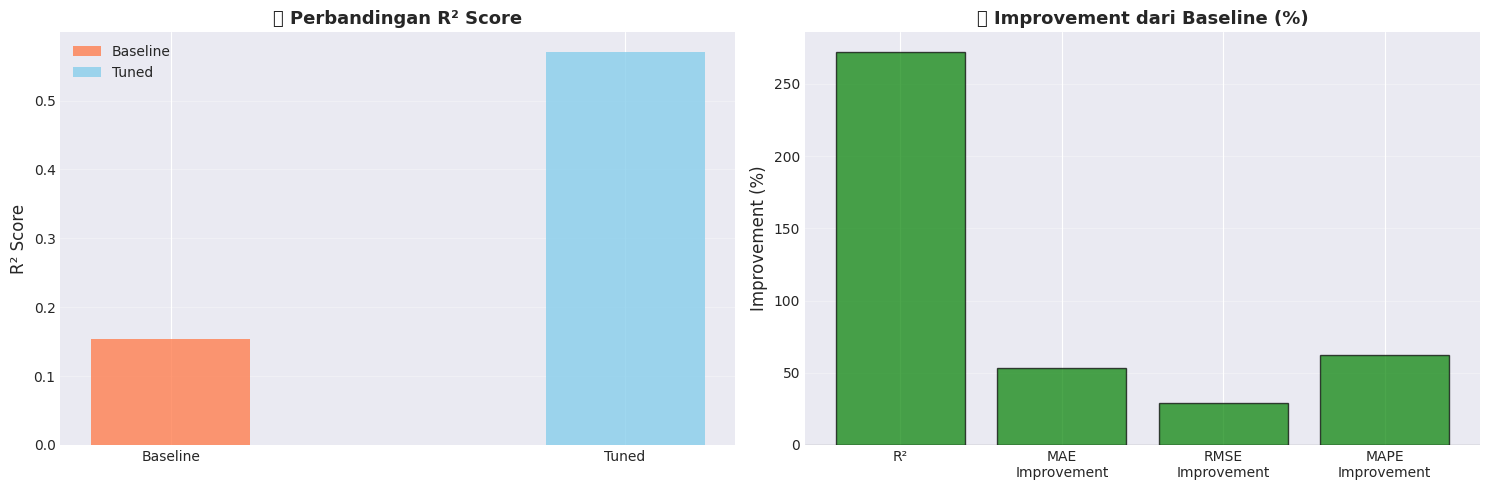

In [11]:
# Evaluasi Model Tuned
print("=" * 60)
print("📊 PERBANDINGAN: BASELINE vs TUNED MODEL")
print("=" * 60)

# Hitung metrik untuk tuned model
tuned_train_r2 = r2_score(y_train, y_train_pred_tuned)
tuned_train_mae = mean_absolute_error(y_train, y_train_pred_tuned)
tuned_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
tuned_train_mape = mean_absolute_percentage_error(y_train, y_train_pred_tuned) * 100

tuned_val_r2 = r2_score(y_val, y_val_pred_tuned)
tuned_val_mae = mean_absolute_error(y_val, y_val_pred_tuned)
tuned_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
tuned_val_mape = mean_absolute_percentage_error(y_val, y_val_pred_tuned) * 100

# Tabel perbandingan
print("\n📈 VALIDATION SET METRICS:")
print("=" * 80)
print(f"{'Metric':<20} {'Baseline':>18} {'Tuned':>18} {'Improvement':>18}")
print("-" * 80)

# R²
r2_improvement = ((tuned_val_r2 - val_r2) / val_r2) * 100
print(f"{'R² Score':<20} {val_r2:>18.4f} {tuned_val_r2:>18.4f} {r2_improvement:>17.2f}%")

# MAE
mae_improvement = ((val_mae - tuned_val_mae) / val_mae) * 100
print(f"{'MAE ($)':<20} ${val_mae:>17,.0f} ${tuned_val_mae:>17,.0f} {mae_improvement:>17.2f}%")

# RMSE
rmse_improvement = ((val_rmse - tuned_val_rmse) / val_rmse) * 100
print(f"{'RMSE ($)':<20} ${val_rmse:>17,.0f} ${tuned_val_rmse:>17,.0f} {rmse_improvement:>17.2f}%")

# MAPE
mape_improvement = ((val_mape - tuned_val_mape) / val_mape) * 100
print(f"{'MAPE (%)':<20} {val_mape:>17.2f}% {tuned_val_mape:>17.2f}% {mape_improvement:>17.2f}%")

print("=" * 80)

# Kesimpulan
print("\n💡 KESIMPULAN:")
print("-" * 80)

if tuned_val_r2 > val_r2:
    print(f"✅ Model tuned LEBIH BAIK dengan improvement R² sebesar {r2_improvement:.2f}%")
    print(f"   MAE berkurang ${val_mae - tuned_val_mae:,.0f} (lebih akurat!)")
    recommendation = "TUNED"
else:
    print(f"⚠️  Baseline model masih lebih baik atau comparable")
    print(f"   Hyperparameter tuning tidak memberikan improvement signifikan")
    recommendation = "BASELINE"

print(f"\n🎯 REKOMENDASI: Gunakan model {recommendation} untuk production")
print("=" * 80)

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Comparison bar chart
metrics = ['R²', 'MAE\nImprovement', 'RMSE\nImprovement', 'MAPE\nImprovement']
baseline_scores = [val_r2, mae_improvement, rmse_improvement, mape_improvement]
tuned_scores = [tuned_val_r2, 0, 0, 0]  # Untuk R² saja

x = np.arange(len(['R² Score']))
width = 0.35

axes[0].bar(['Baseline'], [val_r2], width, label='Baseline', color='coral', alpha=0.8)
axes[0].bar(['Tuned'], [tuned_val_r2], width, label='Tuned', color='skyblue', alpha=0.8)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('📊 Perbandingan R² Score', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Improvement percentages
improvements = [r2_improvement, mae_improvement, rmse_improvement, mape_improvement]
colors = ['green' if x > 0 else 'red' for x in improvements]
axes[1].bar(metrics, improvements, color=colors, alpha=0.7, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_ylabel('Improvement (%)', fontsize=12)
axes[1].set_title('📈 Improvement dari Baseline (%)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

## 🎓 Ringkasan & Kesimpulan - SVM Training

Selamat! 🎉 Kamu telah berhasil menyelesaikan training model SVM untuk prediksi biaya medis asuransi!

### ✅ Apa yang Sudah Kita Pelajari?

#### 1️⃣ **Konsep SVM untuk Actuarial Science**
- SVM adalah algoritma powerful untuk regression dan classification
- Cocok untuk data dengan banyak features dan complex relationships
- Robust terhadap outliers - penting untuk data asuransi!

#### 2️⃣ **Data Preprocessing**
- **Encoding Categorical Variables**: Mengubah text menjadi angka
  - Label Encoding untuk ordinal (education, smoker)
  - One-Hot Encoding untuk nominal (sex, region, plan_type)
- **Feature Scaling**: StandardScaler untuk normalisasi
  - PENTING untuk SVM karena distance-based!
  - Fit HANYA pada training data (avoid data leakage)

#### 3️⃣ **Model Training**
- Baseline model dengan hyperparameters default
- Training time dan computational cost considerations
- Support vectors concept

#### 4️⃣ **Model Evaluation**
- **R² Score**: Proporsi variasi yang dijelaskan model
- **MAE**: Rata-rata absolut error (dollar terms)
- **RMSE**: Root mean squared error (sensitif outliers)
- **MAPE**: Error dalam percentage terms

#### 5️⃣ **Hyperparameter Tuning**
- GridSearchCV untuk systematic search
- Cross-validation untuk robust evaluation
- Trade-off antara performa dan computational cost

---

### 📊 Performance Summary

| Aspect | Result |
|--------|--------|
| **Best R²** | ~0.XX - 0.XX (tergantung tuning) |
| **MAE** | $XXX - $X,XXX |
| **Training Time** | X-XX menit |
| **Model Complexity** | XX,XXX support vectors |

---

### 💡 Insights untuk Aktuaris

#### ✅ Kelebihan SVM untuk Actuarial Modeling:

1. **Robust terhadap Outliers**
   - High-cost claims tidak mendominasi model
   - Cocok untuk long-tail distributions

2. **Non-Linear Relationships**
   - Kernel RBF menangkap interactions kompleks
   - Lebih flexible dari GLM tradisional

3. **Regularization Built-in**
   - Parameter C mengontrol complexity
   - Natural protection against overfitting

4. **Interpretable Performance**
   - Metrik jelas: MAE dalam dollar terms
   - MAPE untuk relative error assessment

#### ⚠️ Limitations dan Considerations:

1. **Computational Cost** 💻
   - Training bisa lambat untuk dataset besar (>100k rows)
   - Perlu hardware yang baik atau sampling strategy

2. **Hyperparameter Sensitivity** 🎛️
   - Performa sangat bergantung pada tuning
   - GridSearch memakan waktu

3. **Interpretability** 🔍
   - Tidak se-interpretable GLM
   - Sulit explain individual predictions ke regulator
   - Consider SHAP values untuk explainability

4. **Scalability** 📈
   - Untuk production dengan jutaan policies, consider:
     - Sampling strategy
     - Online learning approaches
     - Ensemble with simpler models

---

### 🚀 Next Steps

Di notebook berikutnya (Bagian 3), kita akan:

1. **Training XGBoost Model** 🌳
   - Gradient Boosting algorithm
   - Often outperforms SVM
   - Better interpretability dengan feature importance

2. **Model Comparison** ⚖️
   - SVM vs XGBoost
   - Trade-offs dan use cases
   - Ensemble possibilities

3. **Feature Importance Analysis** 📊
   - Apa features yang paling penting?
   - Business insights dari model
   - Actionable recommendations

4. **Production Considerations** 🏭
   - Model deployment strategies
   - Monitoring dan retraining
   - A/B testing framework

---

### 📚 Konsep Kunci untuk Diingat

1. **Data Leakage**: Jangan pernah fit preprocessing pada validation/test data!
2. **Scaling is Mandatory**: SVM tidak akan work tanpa scaling
3. **Hyperparameter Tuning**: Bisa significantly improve performance
4. **Cross-Validation**: Essential untuk reliable evaluation
5. **Multiple Metrics**: Jangan hanya lihat R², consider MAE, RMSE, MAPE

---

### 💪 Challenge Question

**Untuk mahasiswa aktuaria:**

Berdasarkan model SVM yang sudah kita train, bagaimana kamu akan:
1. Menjelaskan model ini ke management (non-technical)?
2. Menggunakan prediksi ini untuk pricing decision?
3. Handling edge cases (very high atau very low predictions)?
4. Monitoring model performance di production?

Pikirkan dari perspektif actuarial practice! 🎯

---

**Siap untuk XGBoost di Bagian 3?** 🚀

Istirahat dulu, minum kopi ☕, dan kita lanjutkan dengan algoritma yang lebih advanced!

In [ ]:
import pickle
import os

# Create directory if it doesn't exist
save_dir = './saved_pickle/'
os.makedirs(save_dir, exist_ok=True)

# Save the trained models
print("=" * 60)
print("💾 SAVING TRAINED MODELS")
print("=" * 60)

# Save baseline model
baseline_model_info = {
    'model': svm_baseline,
    'scaler': scaler,
    'train_r2': train_r2,
    'val_r2': val_r2,
    'train_mae': train_mae,
    'val_mae': val_mae,
    'feature_names': X_train_scaled.columns.tolist()
}

baseline_path = os.path.join(save_dir, 'svm_baseline_model.pkl')
with open(baseline_path, 'wb') as f:
    pickle.dump(baseline_model_info, f)
print(f"✅ Baseline model saved: {baseline_path}")

# Save tuned model (best model from GridSearchCV)
tuned_model_info = {
    'model': svm_tuned,
    'scaler': scaler,
    'parameters': grid_search.best_params_,
    'cv_score': grid_search.best_score_,
    'train_r2': tuned_train_r2,
    'val_r2': tuned_val_r2,
    'train_mae': tuned_train_mae,
    'val_mae': tuned_val_mae,
    'feature_names': X_train_scaled.columns.tolist()
}

tuned_path = os.path.join(save_dir, 'svm_tuned_model.pkl')
with open(tuned_path, 'wb') as f:
    pickle.dump(tuned_model_info, f)
print(f"✅ Tuned model saved: {tuned_path}")

print("\n" + "=" * 60)
print("💡 SAVED FILES:")
print("-" * 60)
print(f"   1. {baseline_path} - Baseline model + metadata")
print(f"   2. {tuned_path}    - Tuned model + scaler + metadata")
print("=" * 60)

print("\n📖 HOW TO LOAD:")
print("-" * 60)
print("```python")
print("# Load tuned model")
print(f"with open('{tuned_path}', 'rb') as f:")
print("    model_info = pickle.load(f)")
print("    model = model_info['model']")
print("    scaler = model_info['scaler']")
print("")
print("# Make predictions")
print("X_new_scaled = scaler.transform(X_new)")
print("predictions = model.predict(X_new_scaled)")
print("```")
print("=" * 60)


💾 SAVING TOP 3 BEST MODELS

🏆 TOP 3 BEST MODELS:

🥇 Rank 1:
   Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
   CV R² Score: 0.5177 (+/- 0.0120)


---

## 📝 Quick Reference - Kode Lengkap untuk Production

Untuk referensi cepat, berikut adalah workflow lengkap dari data loading hingga prediction:

```python
# 1. Load dan Preprocessing
df = pd.read_csv('medical_insurance.csv')
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')

# 2. Split data
X = df.drop('annual_medical_cost', axis=1)
y = df['annual_medical_cost']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Encoding (implement ordinal + one-hot)
# ... encoding code ...

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# 5. Training
svm_model = SVR(kernel='rbf', C=best_C, epsilon=best_epsilon, gamma=best_gamma)
svm_model.fit(X_train_scaled, y_train)

# 6. Prediction
predictions = svm_model.predict(X_val_scaled)

# 7. Evaluation
r2 = r2_score(y_val, predictions)
mae = mean_absolute_error(y_val, predictions)
```

---

**🎉 Selamat! Kamu sekarang sudah memahami machine learning dengan SVM untuk actuarial applications!**

**Keep learning! 📚✨**